In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv("racial_breakdown/1980.csv", encoding='latin-1')
df.shape

(74002, 13)

In [3]:
df.head()

,Geo_FIPS,Geo_NAME,Geo_QName,Geo_NATION,Geo_STATE,Geo_COUNTY,Geo_CT,SE_T012_001,SE_T012_002,SE_T012_003,SE_T012_004,SE_T012_005,SE_T012_006
0,1001020100,Census Tract 201,"Census Tract 201, Autauga County, Alabama",0,1,1,20100,1583.979102,1543.979630,31.999578,2.99996,4.999934,0.000000
1,1001020200,Census Tract 202,"Census Tract 202, Autauga County, Alabama",0,1,1,20200,2233.000029,840.000011,1388.000018,0.00000,3.000000,2.000000
2,1001020300,Census Tract 203,"Census Tract 203, Autauga County, Alabama",0,1,1,20300,3136.000025,2634.000021,467.000004,12.00000,19.000000,4.000000
3,1001020400,Census Tract 204,"Census Tract 204, Autauga County, Alabama",0,1,1,20400,4927.999972,4889.999972,1.000000,8.00000,10.000000,19.000000
4,1001020500,Census Tract 205,"Census Tract 205, Autauga County, Alabama",0,1,1,20500,1531.185570,1430.276440,70.388402,6.99304,8.286086,15.241602


In [4]:
df.dtypes

Geo_FIPS         int64
Geo_NAME        object
Geo_QName       object
Geo_NATION       int64
Geo_STATE        int64
Geo_COUNTY       int64
Geo_CT           int64
SE_T012_001    float64
SE_T012_002    float64
SE_T012_003    float64
SE_T012_004    float64
SE_T012_005    float64
SE_T012_006    float64
dtype: object

In [5]:
df.columns

Index(['Geo_FIPS', 'Geo_NAME', 'Geo_QName', 'Geo_NATION', 'Geo_STATE',
       'Geo_COUNTY', 'Geo_CT', 'SE_T012_001', 'SE_T012_002', 'SE_T012_003',
       'SE_T012_004', 'SE_T012_005', 'SE_T012_006'],
      dtype='object')

In [6]:
df.columns = df.columns.str.replace("SE_","")
df.head()

,Geo_FIPS,Geo_NAME,Geo_QName,Geo_NATION,Geo_STATE,Geo_COUNTY,Geo_CT,T012_001,T012_002,T012_003,T012_004,T012_005,T012_006
0,1001020100,Census Tract 201,"Census Tract 201, Autauga County, Alabama",0,1,1,20100,1583.979102,1543.979630,31.999578,2.99996,4.999934,0.000000
1,1001020200,Census Tract 202,"Census Tract 202, Autauga County, Alabama",0,1,1,20200,2233.000029,840.000011,1388.000018,0.00000,3.000000,2.000000
2,1001020300,Census Tract 203,"Census Tract 203, Autauga County, Alabama",0,1,1,20300,3136.000025,2634.000021,467.000004,12.00000,19.000000,4.000000
3,1001020400,Census Tract 204,"Census Tract 204, Autauga County, Alabama",0,1,1,20400,4927.999972,4889.999972,1.000000,8.00000,10.000000,19.000000
4,1001020500,Census Tract 205,"Census Tract 205, Autauga County, Alabama",0,1,1,20500,1531.185570,1430.276440,70.388402,6.99304,8.286086,15.241602


In [7]:
# Standard old style decoding columns:
# df.rename(columns={
#     "T012_001": "Total"
#     "T012_002": "White"
#     "T012_003":
#     "T012_004":
#     "T012_005":
#     "T012_006":
# })

In [8]:
# Attempt to make pandas look at plaintext Code Book that came with the data

# This doesn't work because the text has lots chat, etc.  Need it to just look at a handful of rows.
# pd.read_csv("racial_breakdown/1980.txt", sep=':')

# This doesn't work because the some rows use a semicolon and that's our seperator
# pd.read_csv("racial_breakdown/1980.txt", sep=':', skiprows=41, nrows=12)

# This sloppy nonsense works because of the spaces after the separator
# pd.read_csv("racial_breakdown/1980.txt", sep=':    ', skiprows=41, nrows=13)

# Now FIPS is set as the column names, but we will fix that with a variable that provides good names: 
pd.read_csv("racial_breakdown/1980.txt", sep=':    ', skiprows=41, nrows=13, names=['code', 'name'])

C:\Program Files (x86)\Python37-32\lib\site-packages\ipykernel_launcher.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  del sys.path[0]


,code,name
0,FIPS,FIPS
1,NAME,Name of Area
2,QName,Qualifying Name
3,NATION,Nation
4,STATE,State
5,COUNTY,County
6,CT,Census Tract
7,T012_001,Total Population
8,T012_002,Total Population: White
9,T012_003,Total Population: Black


In [9]:
codes = pd.read_csv("racial_breakdown/1980.txt", sep=':    ', skiprows=41, nrows=13, names=['code', 'name'])

C:\Program Files (x86)\Python37-32\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [10]:
codes

,code,name
0,FIPS,FIPS
1,NAME,Name of Area
2,QName,Qualifying Name
3,NATION,Nation
4,STATE,State
5,COUNTY,County
6,CT,Census Tract
7,T012_001,Total Population
8,T012_002,Total Population: White
9,T012_003,Total Population: Black


In [11]:
# We're making a dictionary with keys & values
# Aslo removing blanck space on both sides
codes['name'] = codes.name.str.strip()
dict(zip(codes.code, codes.name))

{'FIPS': 'FIPS',
 'NAME': 'Name of Area',
 'QName': 'Qualifying Name',
 'NATION': 'Nation',
 'STATE': 'State',
 'COUNTY': 'County',
 'CT': 'Census Tract',
 'T012_001': 'Total Population',
 'T012_002': 'Total Population: White',
 'T012_003': 'Total Population: Black',
 'T012_004': 'Total Population: American Indian, Eskimo, and Aleut',
 'T012_005': 'Total Population: Asian and Pacific Islander',
 'T012_006': 'Total Population: Other'}

In [12]:
# save as dict
codes_dict = dict(zip(codes.code, codes.name))

In [13]:
df = df.rename(columns=codes_dict)

In [14]:
codes_dict

{'FIPS': 'FIPS',
 'NAME': 'Name of Area',
 'QName': 'Qualifying Name',
 'NATION': 'Nation',
 'STATE': 'State',
 'COUNTY': 'County',
 'CT': 'Census Tract',
 'T012_001': 'Total Population',
 'T012_002': 'Total Population: White',
 'T012_003': 'Total Population: Black',
 'T012_004': 'Total Population: American Indian, Eskimo, and Aleut',
 'T012_005': 'Total Population: Asian and Pacific Islander',
 'T012_006': 'Total Population: Other'}

In [15]:
df['pct_white'] = df['Total Population: White'] / df['Total Population']
df.head()

,Geo_FIPS,Geo_NAME,Geo_QName,Geo_NATION,Geo_STATE,Geo_COUNTY,Geo_CT,Total Population,Total Population: White,Total Population: Black,"Total Population: American Indian, Eskimo, and Aleut",Total Population: Asian and Pacific Islander,Total Population: Other,pct_white
0,1001020100,Census Tract 201,"Census Tract 201, Autauga County, Alabama",0,1,1,20100,1583.979102,1543.979630,31.999578,2.99996,4.999934,0.000000,0.974747
1,1001020200,Census Tract 202,"Census Tract 202, Autauga County, Alabama",0,1,1,20200,2233.000029,840.000011,1388.000018,0.00000,3.000000,2.000000,0.376176
2,1001020300,Census Tract 203,"Census Tract 203, Autauga County, Alabama",0,1,1,20300,3136.000025,2634.000021,467.000004,12.00000,19.000000,4.000000,0.839923
3,1001020400,Census Tract 204,"Census Tract 204, Autauga County, Alabama",0,1,1,20400,4927.999972,4889.999972,1.000000,8.00000,10.000000,19.000000,0.992289
4,1001020500,Census Tract 205,"Census Tract 205, Autauga County, Alabama",0,1,1,20500,1531.185570,1430.276440,70.388402,6.99304,8.286086,15.241602,0.934097


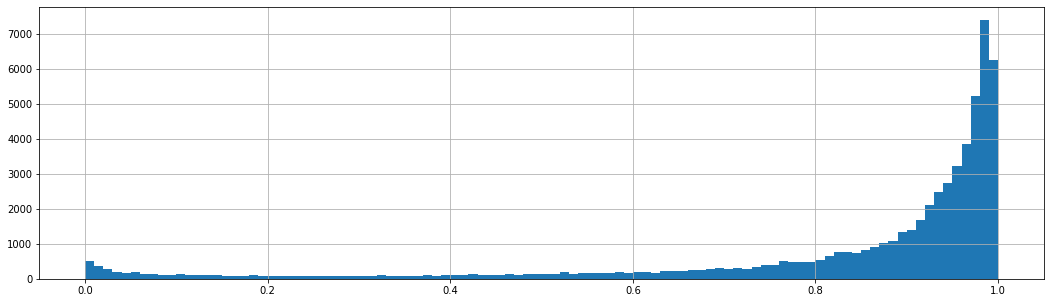

In [21]:
df.pct_white.hist(bins=100, figsize=(18,5))